In [12]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Day 0

## Endocrine factors underexpression

In [13]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d0/"
filenames=os.listdir(base_dir)

In [14]:
filenames.sort()

In [15]:
filenames

['HES1_0_over.pt',
 'HES1_0_under.pt',
 'HES1_1_over.pt',
 'HES1_1_under.pt',
 'HES1_2_over.pt',
 'HES1_2_under.pt',
 'NEUROG3_0_over.pt',
 'NEUROG3_0_under.pt',
 'NEUROG3_1_over.pt',
 'NEUROG3_1_under.pt',
 'NEUROG3_2_over.pt',
 'NEUROG3_2_under.pt',
 'NKX6-1_0_over.pt',
 'NKX6-1_0_under.pt',
 'NKX6-1_1_over.pt',
 'NKX6-1_1_under.pt',
 'NKX6-1_2_over.pt',
 'NKX6-1_2_under.pt',
 'PTF1A_0_over.pt',
 'PTF1A_0_under.pt',
 'PTF1A_1_over.pt',
 'PTF1A_1_under.pt',
 'PTF1A_2_over.pt',
 'PTF1A_2_under.pt',
 'control1_0_over.pt',
 'control1_0_under.pt',
 'control1_1_over.pt',
 'control1_1_under.pt',
 'control1_2_over.pt',
 'control1_2_under.pt',
 'endocrine_0_over.pt',
 'endocrine_0_under.pt',
 'endocrine_1_over.pt',
 'endocrine_1_under.pt',
 'endocrine_2_over.pt',
 'endocrine_2_under.pt',
 'exocrine_0_over.pt',
 'exocrine_0_under.pt',
 'exocrine_1_over.pt',
 'exocrine_1_under.pt',
 'exocrine_2_over.pt',
 'exocrine_2_under.pt']

In [16]:
#filenames=[filenames[31],filenames[33],filenames[35]]
filenames=[filenames[31],filenames[33],filenames[35]]

In [17]:
filenames

['endocrine_0_under.pt', 'endocrine_1_under.pt', 'endocrine_2_under.pt']

In [18]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [19]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [20]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [21]:
test=np.array(endo_dist)

In [22]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [23]:
endo_dist[0][1]

array([0.445, 0.39 , 0.44 , 0.4  , 0.49 , 0.46 , 0.38 , 0.41 , 0.43 ,
       0.435])

In [24]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.3620102309678648
-0.011499999999999955
2.578189895756966e-06
-0.0655
2.471856488868341e-09
-0.0675


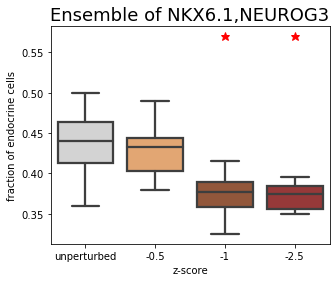

In [25]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","sandybrown","sienna","brown"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.57
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "-0.5","-1","-2.5"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [26]:
test=np.array(exo_dist)

In [27]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [28]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

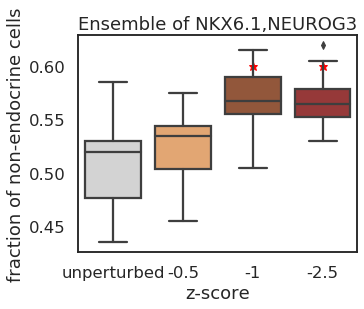

In [29]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","sandybrown","sienna","brown"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.6
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "-0.5","-1","-2.5"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

## Exocrine factors underexpression

In [86]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d0/"
filenames=os.listdir(base_dir)

In [87]:
filenames.sort()

In [88]:
#filenames=[filenames[31],filenames[33],filenames[35]]
filenames=[filenames[37],filenames[39],filenames[41]]

In [89]:
filenames

['exocrine_0_under.pt', 'exocrine_1_under.pt', 'exocrine_2_under.pt']

In [90]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [91]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [92]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [93]:
test=np.array(endo_dist)

In [94]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [95]:
endo_dist[0][1]

array([0.475, 0.45 , 0.455, 0.405, 0.445, 0.44 , 0.49 , 0.445, 0.465,
       0.41 ])

In [96]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.5422506778706913
0.006166666666666765
0.04182160537691125
0.030166666666666675
0.0037952629198622825
0.03116666666666673


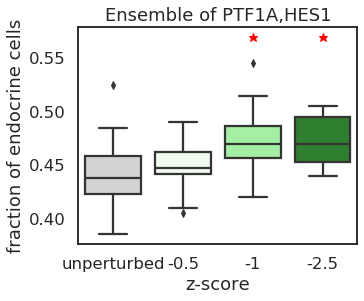

In [97]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
#mypal=["lightgrey","sandybrown","sienna","brown"]
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.57
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "-0.5","-1","-2.5"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [98]:
test=np.array(exo_dist)

In [99]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [100]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

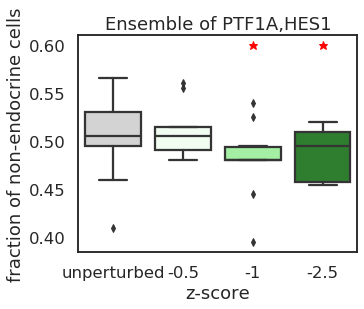

In [101]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.6
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "-0.5","-1","-2.5"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

# Endocrine underexpression timing plot

In [36]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/"
filenames=os.listdir(base_dir)
filenames.sort()

In [37]:
differences=[]
paired_t=[]
for elt in filenames:
    print(elt)
    files=os.listdir(base_dir+elt)
    files.sort()
    results=torch.load(base_dir+elt+"/"+files[35])
    all_results = []
    all_results.append(results)
    endo_dist = []
    exo_dist = []
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)

    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

    
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    differences.append(endo_dist[0][1]-endo_dist[0][0])
    #differences.append(cohen_d(endo_dist[0][1], endo_dist[0][0]))

d0
d1
d2
d3
d4
d5
d6


Text(0.5, 0, 'Day (introduction of silico perturbation)')

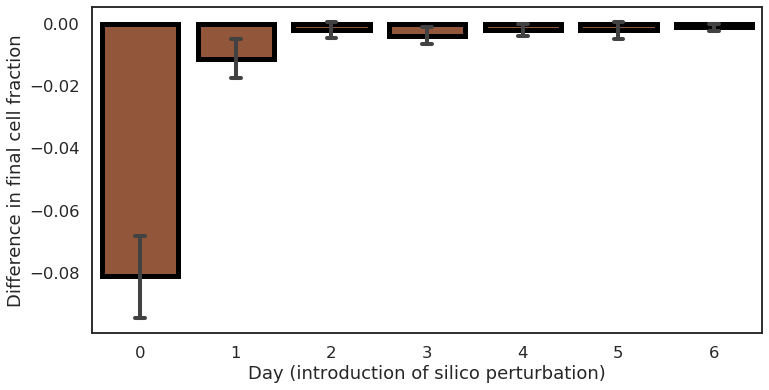

In [39]:
fig, ax = plt.subplots(figsize=(12,6), sharex=True, sharey=True)
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
#ax.set_ylim(-0.05,0.25)
#ax.title.set_text("Overexpression (z=5) introduced at different timepoints")
mypal=["sienna"]
g=sns.barplot(data=differences, palette=mypal, linewidth=5, edgecolor="k",capsize=.1)
#plt.bar(np.arange(0,8,1),differences)
g.set_ylabel("Difference in final cell fraction")
g.set_xlabel("Day (introduction of silico perturbation)")
#ax.table([np.average(differences, axis=1), np.std(differences, axis=1)])